The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [128]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [129]:
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [130]:
# Question 1
top_gender = df['sex'].mode().astype('string').iloc[0]
top_country = df['birth_country'].mode().astype('string').iloc[0]

print("Top gender: " + top_gender + ", Top country: " + top_country)
print(top_country)

Top gender: Male, Top country: United States of America
United States of America


In [131]:
df.shape

(1000, 18)

<AxesSubplot: xlabel='year', ylabel='count'>

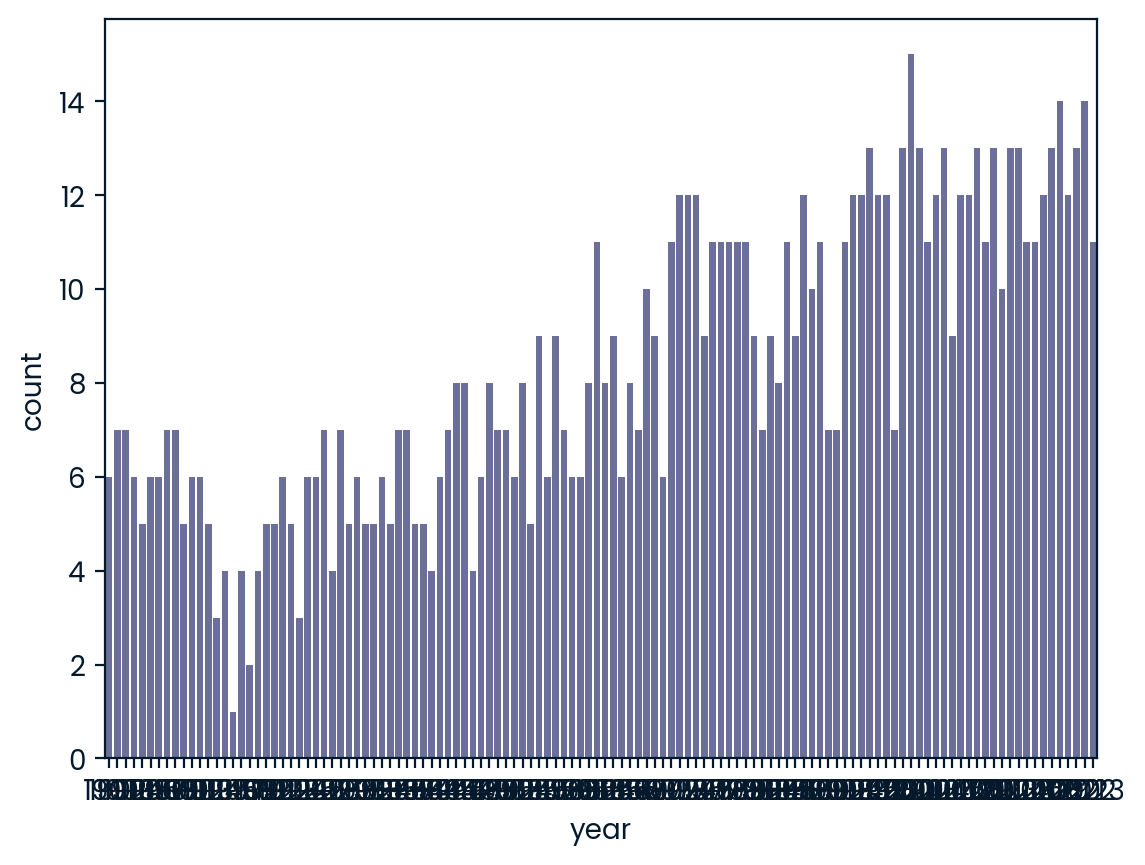

In [132]:
sns.countplot(x=df['year'])

In [133]:
# EXTRA stuff blah blah...
df_years = df['year']
count_years = df_years.value_counts().sort_index(ascending=True)
print(type(count_years))
count_years.head()

# changing into a dataframe
count_years = pd.DataFrame({'year': count_years.index, 'count': count_years.values})
print(type(count_years))
count_years.head(10)

# counting the noble prizes in each decade
decade_count = {}
count = 0
end_yr = 0
start_yr = 0
for label, row in count_years.iterrows():
    if row['year'] % 10 == 1:
        start_yr = row['year']
        count = row['count']
    elif row['year'] % 10 == 0:
        end_yr = row['year']
        count += row['count']
        decade_count[f"{start_yr}'-{end_yr}"] = count
        
        # resseting the count to 0
        count = 0
    else:
        count += row['count']

decade_count[f"{start_yr}'-{end_yr+10}"] = count

print(decade_count)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
{"1901'-1910": 62, "1911'-1920": 40, "1921'-1930": 54, "1931'-1950": 102, "1951'-1960": 70, "1961'-1970": 82, "1971'-1980": 106, "1981'-1990": 97, "1991'-2000": 106, "2001'-2010": 121, "2011'-2020": 122, "2021'-2030": 38}


        sum  count
decade            
1900      1     57
1910      3     40
1920      4     54
1930     14     56
1940     13     43
1950     21     72
1960     21     79
1970     33    104
1980     31     97
1990     42    104
2000     52    123
2010     38    121
2020     18     50

 2000 <class 'numpy.int64'>


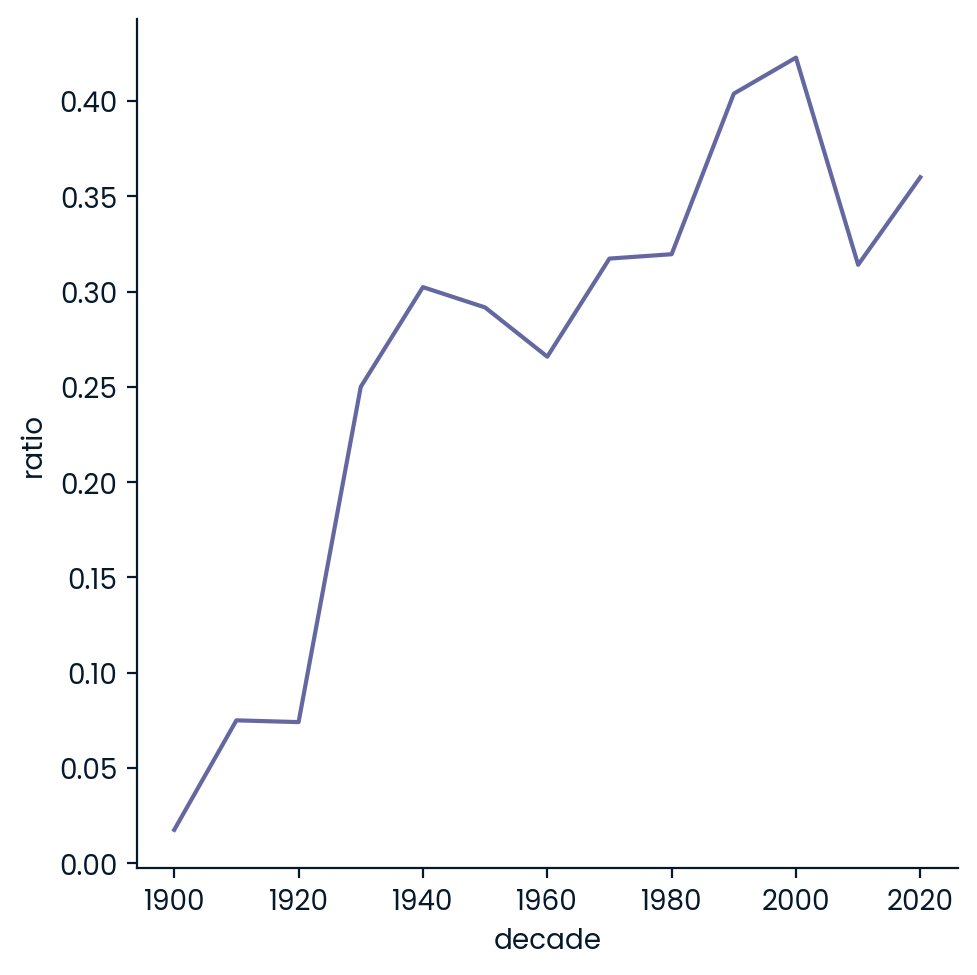

In [134]:
# Question 2
df['US_born'] = df['birth_country'] == "United States of America"

df['decade'] = (np.floor(df['year'] /10) * 10).astype(int)
# df[df['US_born']==True].tail(20)

decade_usa = df.groupby('decade')['US_born'].agg([sum, 'count'])
print(decade_usa)
decade_usa['ratio'] = decade_usa['sum'] / decade_usa['count']
max_decade_usa = decade_usa[decade_usa['ratio'] == decade_usa['ratio'].max()].index[0]

print("\n",max_decade_usa, type(max_decade_usa))

sns.relplot(kind='line', x=decade_usa.index, y=decade_usa['ratio'])
import matplotlib.pyplot as plt
plt.show()

In [135]:
# Question 3

# Calculate the proportion of female laureates for each decade and category combination
df['is_female'] = df['sex'] == 'Female'
decade_by_category = df.groupby(['decade', 'category'])['is_female'].agg([sum, 'count'])
decade_by_category['ratio'] = decade_by_category['sum'] / decade_by_category['count']

# Find the combination with the highest proportion of female laureates
max_female_ratio = decade_by_category['ratio'].idxmax()
max_female_ratio_value = decade_by_category['ratio'].max()

print(max_female_ratio, max_female_ratio_value)

max_female_dict = {max_female_ratio[0]: max_female_ratio[1]}

(2020, 'Literature') 0.5


In [136]:
# Question 4

first_woman = df[df['sex']=='Female'].iloc[0]
print(first_woman)
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

In [137]:
# Question 5

full_name_count = df['full_name'].value_counts()
repeat_list = full_name_count[full_name_count > 1].index.tolist()
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']